In [3]:
pip install pandas numpy scikit-learn matplotlib yfinance


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.10.2 requires ruamel-yaml, which is not installed.



  Attempting uninstall: pytz
    Found existing installation: pytz 2021.3
    Uninstalling pytz-2021.3:
      Successfully uninstalled pytz-2021.3
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
  Attempting uninstall: lxml
    Found existing installation: lxml 4.8.0
    Uninstalling lxml-4.8.0:
      Successfully uninstalled lxml-4.8.0


[*********************100%%**********************]  1 of 1 completed


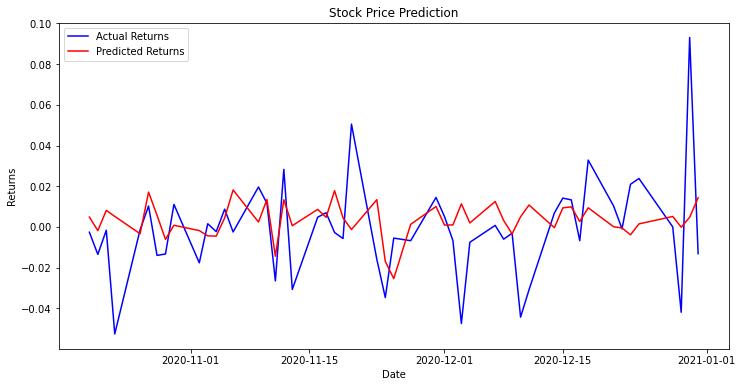

Mean Squared Error: 0.0006234853342474044
R-squared: -0.06496857915022525


In [4]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Define the stock symbol and date range
stock_symbol = 'AAPL'
start_date = '2020-01-01'
end_date = '2021-01-01'

# Download historical stock data using Yahoo Finance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Calculate the daily returns
stock_data['Returns'] = stock_data['Adj Close'].pct_change()

# Drop missing values
stock_data.dropna(inplace=True)

# Define features (e.g., lagged returns)
stock_data['Lagged_Return'] = stock_data['Returns'].shift(1)
stock_data.dropna(inplace=True)

# Split the data into training and testing sets
X = stock_data[['Lagged_Return']].values
y = stock_data['Returns'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict stock returns
y_pred = model.predict(X_test)

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index[-len(y_test):], y_test, label='Actual Returns', color='blue')
plt.plot(stock_data.index[-len(y_test):], y_pred, label='Predicted Returns', color='red')
plt.legend()
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.show()

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
